In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
IMG_SIZE=224
BATCH_SIZE=32

In [3]:
train_datagen=ImageDataGenerator(rescale=1.0/255,validation_split=0.2)

In [22]:
train_generator=train_datagen.flow_from_directory('/content/drive/MyDrive/MAIN',
target_size=(IMG_SIZE,IMG_SIZE),
batch_size=BATCH_SIZE,
class_mode='categorical',
subset='training'
)

Found 3200 images belonging to 4 classes.


In [23]:
val_generator=train_datagen.flow_from_directory('/content/drive/MyDrive/MAIN',
target_size=(IMG_SIZE,IMG_SIZE),
batch_size=BATCH_SIZE,
class_mode='categorical',
subset='validation'
)

Found 800 images belonging to 4 classes.


In [24]:
class_indices = train_generator.class_indices
class_names = list(class_indices.keys())
print("Class indices:", class_indices)
print("Class names:", class_names)

Class indices: {'MILD': 0, 'MODERATE': 1, 'NON-DEMENTED': 2, 'VERY MILD': 3}
Class names: ['MILD', 'MODERATE', 'NON-DEMENTED', 'VERY MILD']


In [62]:
model=keras.Sequential([
    layers.Conv2D(32,(3,3), activation='relu',input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(4, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [65]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,476 (42.61 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [66]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [67]:
model.fit(train_generator, epochs= 5, validation_data=val_generator, batch_size=BATCH_SIZE)

Epoch 1/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.3169 - loss: 1.5825

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 949s 9s/step - accuracy: 0.3177 - loss: 1.5798 - val_accuracy: 0.5638 - val_loss: 1.0183
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 536s 5s/step - accuracy: 0.5825 - loss: 0.9500 - val_accuracy: 0.6050 - val_loss: 0.9213
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 557s 6s/step - accuracy: 0.7130 - loss: 0.7011 - val_accuracy: 0.6137 - val_loss: 0.8505
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 540s 5s/step - accuracy: 0.7937 - loss: 0.5303 - val_accuracy: 0.6275 - val_loss: 0.9221
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 479s 5s/step - accuracy: 0.8482 - loss: 0.3917 - val_accuracy: 0.6525 - val_loss: 1.0028


In [32]:
model.save('/content/drive/MyDrive/MAIN.h5')

In [33]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt #visualization
import numpy as np
model=load_model('/content/drive/MyDrive/MAIN.h5')
print("Model Loaded")

Model Loaded


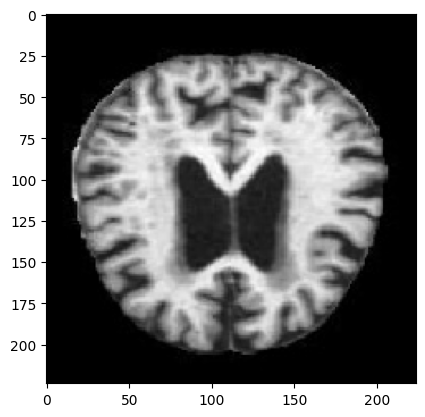

In [69]:
test_image_path='/content/drive/MyDrive/MAIN/MILD/001f89e3-8207-4ee4-80d7-711c2acd191a.jpg'
img=image.load_img(test_image_path,target_size=(224,224))
plt.imshow(img)
plt.axis()
plt.show()

In [70]:
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array=img_array/255.0

In [73]:
prediction=model.predict(img_array)
ind=np.argmax(prediction[0])
print(class_names[ind])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
NON-DEMENTED
